In [122]:
import pandas as pd
import numpy as np


input_dir = "options_data/master_iv_rv_crush_with_price_change_2.csv"
output_dir = "options_data/master_iv_rv_crush_with_price_change_final.csv"
input = pd.read_csv(input_dir)

In [123]:
input

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30
0,AAL,2022-01-20,call,18.5,2022-01-19,2022-01-21,0.48,0.29,-0.19,1.239547,0.747508,0.492039,0.257414
1,AAL,2022-01-20,put,18.5,2022-01-19,2022-01-21,1.39,2.88,1.49,3.607027,NaN,NaN,0.257414
2,AAL,2022-04-21,call,18.5,2022-04-20,2022-04-22,1.40,2.96,1.56,3.626442,NaN,NaN,0.317945
3,AAL,2022-04-21,put,18.5,2022-04-20,2022-04-22,0.54,1.14,0.60,1.401531,2.957433,-1.555903,0.317945
4,AAL,2022-07-21,call,15.5,2022-07-20,2022-07-22,0.60,0.56,-0.04,1.851339,1.727610,0.123729,0.222047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,ZBRA,2025-04-29,put,250.0,2025-04-28,2025-04-30,17.60,23.30,5.70,3.379300,4.477069,-1.097769,1.019806
6018,ZBRA,2025-08-05,call,340.0,2025-08-04,2025-08-06,20.84,17.50,-3.34,2.935122,2.463471,0.471650,1.520862
6019,ZBRA,2025-08-05,put,340.0,2025-08-04,2025-08-06,16.58,22.92,6.34,2.340197,3.235649,-0.895452,1.520862
6020,ZBRA,2025-10-28,call,300.0,2025-10-27,2025-10-29,28.50,12.00,-16.50,4.557274,1.913211,2.644063,0.907466


In [124]:
#pre-processing 
input["earn_date"] = pd.to_datetime(input['earn_date'])
input = input.sort_values("earn_date")
input['earn_date'] = input['earn_date'].sample(frac=1, random_state=None).reset_index(drop=True)

In [125]:
tickers = [
    "AAPL","MSFT","GOOGL","GOOG","AMZN","META","NVDA","AVGO","CRM","ADBE","CSCO",
    "ORCL","TXN","QCOM","AMD","IBM","INTC","AMAT","INTU","MU","ANET","NOW","KLAC",
    "LRCX","SNPS","CDNS","PANW","FTNT","BKNG","NFLX","ADP","PAYX","MSI","HPQ",
    "WDC","ZBRA","GLW","AKAM","ENPH","FSLR","MCHP","MPWR","SWKS","QRVO","TSM",
    "JPM","BAC","WFC","C","GS","MS","BLK","SCHW","CME","ICE","SPGI","MCO","CB",
    "PGR","TRV","AIG","AON","MET","PRU","ALL","AFL","BK","STT","TFC","USB","RF",
    "MTB","HBAN","FITB","CMA","KEY","COF","DFS","PNC","V","MA","PYPL","AXP",
    "BRK.B","TROW","AMP","BEN","IVZ","NTRS","TSLA","HD","MCD","NKE","SBUX","TJX",
    "LOW","TGT","ROST","DG","DLTR","MAR","HLT","EBAY","ETSY","YUM","CMG","CCL",
    "RCL","NCLH","AAP","AZO","ORLY","ULTA","LEN","PHM","DHI","NVR","TOL","POOL",
    "PG","KO","PEP","WMT","COST","MDLZ","MO","PM","KMB","CL","CLX","TAP","STZ",
    "GIS","K","CPB","SJM","KR","WBA","HSY","CHD","BG","ADM","CAT","DE","UPS",
    "FDX","GE","HON","MMM","ITW","EMR","ETN","PH","ROK","GWW","JCI","CARR",
    "OTIS","CSX","NSC","UNP","LUV","DAL","AAL","UAL","MAS","J","IR","NDSN","FAST",
    "SNA","CMI","PCAR","URI","ALLE","AME","AOS","EXPD","XOM","CVX","COP","OXY",
    "EOG","PXD","DVN","MRO","APA","HES","VLO","MPC","PSX","HAL","SLB","BKR",
    "LIN","APD","ECL","SHW","NUE","NEM","FCX","MOS","CF","ALB","MLM","VMC","PKG",
    "IP","WRK","BALL","T","VZ","TMUS","NEE","DUK","SO","SRE","EXC","AEP","XEL",
    "PEG","ED","D","WEC","EIX","PNW","AEE","CMS"
]

test = input[input["ticker"].isin(tickers)]
test

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30
1363,CSCO,2024-11-07,put,56.0,2021-11-16,2021-11-18,1.57,2.20,0.63,1.346252,1.885528,-0.539276,NaN
1362,CSCO,2025-11-05,call,56.0,2021-11-16,2021-11-18,1.95,0.48,-1.47,1.664924,0.407225,1.257699,NaN
2837,J,2023-05-03,put,140.0,2021-11-22,2021-11-24,1.85,6.10,4.25,0.636167,2.091060,-1.454892,NaN
2836,J,2023-01-25,call,140.0,2021-11-22,2021-11-24,9.50,11.29,1.79,3.250473,3.865478,-0.615005,NaN
2495,HPQ,2024-10-31,put,31.0,2021-11-22,2021-11-24,0.90,0.26,-0.64,1.394010,0.404957,0.989053,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,EOG,2022-08-02,call,108.0,2025-11-05,2025-11-07,3.00,1.40,-1.60,1.327327,0.617568,0.709759,0.252849
1394,CSCO,2024-07-31,call,70.0,2025-11-11,2025-11-13,13.30,7.45,-5.85,NaN,NaN,NaN,0.218860
1395,CSCO,2025-04-29,put,70.0,2025-11-11,2025-11-13,7.00,2.65,-4.35,4.805149,1.817030,2.988119,0.218860
464,AMAT,2023-12-13,call,220.0,2025-11-12,2025-11-14,20.28,25.00,4.72,4.421369,NaN,NaN,0.263165


In [126]:
##IV filter section - CHANGE TO PRINT MORE CASH
master = test.copy()

##IV_pre RV ratio
master["IV_pre / RV"] = master["IV_pre"] / master["RV30"]
master = master[master["IV_pre / RV"] >= 17]


##consistent outperformers
  

master


,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30,IV_pre / RV
2981,KR,2024-07-23,put,41.0,2021-12-01,2021-12-03,2.38,4.10,1.72,2.785837,4.805149,-2.019312,0.156476,17.803659
716,BAC,2023-05-04,call,45.0,2022-01-18,2022-01-20,4.04,7.00,2.96,4.305481,NaN,NaN,0.196838,21.873235
4748,RF,2024-10-31,call,24.0,2022-01-19,2022-01-21,2.40,0.90,-1.50,4.798537,1.793339,3.005198,0.251640,19.069062
3957,NFLX,2025-04-23,put,545.0,2022-01-19,2022-01-21,47.35,124.57,77.22,4.172479,NaN,NaN,0.169866,24.563349
2010,FCX,2023-02-08,call,40.0,2022-01-25,2022-01-27,3.45,3.15,-0.30,4.135494,3.774370,0.361123,0.205080,20.165253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,AAP,2023-01-25,put,57.0,2025-10-29,2025-10-31,4.77,7.75,2.98,4.018508,NaN,NaN,0.142336,28.232552
2148,FTNT,2024-10-31,call,85.0,2025-11-04,2025-11-06,4.93,1.52,-3.41,2.776917,0.853215,1.923703,0.155950,17.806407
2149,FTNT,2023-11-15,put,85.0,2025-11-04,2025-11-06,5.18,5.43,0.25,2.924748,3.066042,-0.141293,0.155950,18.754343
627,APA,2022-04-21,put,22.5,2025-11-04,2025-11-06,1.93,0.38,-1.55,4.119344,0.812186,3.307158,0.238164,17.296232


In [127]:
#calcualtion s

#winrate of trade - number of negatives / total
#average win
#average loss


master["percentage_change"] = master["price_change"] / master["price_pre"]
master["win/loss"] = np.where(master["price_change"] < 0, 1, 0) #win/loss column


In [128]:
# For each symbol, compute max consecutive losses
def max_consecutive_losses(x):
    # Identify where loss streaks reset (win_loss != 0)
    return (x == 0).astype(int).groupby((x != 0).cumsum()).sum().max()

# Compute max streak per symbol
loss_streaks = (
    master.groupby("ticker")["win/loss"]
      .apply(max_consecutive_losses)
)

# Find symbols with 4+ losses in a row
bad_symbols = loss_streaks[loss_streaks >= 3].index
bad_symbols

# Filter them out of the dataframe
master = master[~master["ticker"].isin(bad_symbols)]

In [129]:
win_rate = master["win/loss"].mean()
print(f"Win Rate: {win_rate}")

# Average win and loss percentage
average_win = abs(master.loc[master["price_change"] < 0, "percentage_change"].mean())
average_loss = abs(master.loc[master["price_change"] > 0, "percentage_change"].mean())
print(f"Average Win: {average_win}")
print(f"Average Loss: {average_loss}")

#mean percentage change for wins
#mean percentage change for losses 
win = win_rate * average_win 
loss = ((1 - win_rate) * average_loss)

net_expected = win - loss
net_expected

Win Rate: 0.7080745341614907
Average Win: 0.5569402332497443
Average Loss: 0.7626319164308805


np.float64(0.17172351874670475)

In [130]:
#kelly criterion
#pricechange / pricepre <- wins and losses, and get the average for each 

def kelly_criterion(win_rate, avg_win, avg_loss):
    """
    Calculate Kelly Criterion for position sizing
    
    Parameters:
    win_rate (float): Probability of winning (0 to 1)
    avg_win (float): Average win percentage (e.g., 0.05 for 5%)
    avg_loss (float): Average loss percentage (e.g., -0.02 for -2%)
    
    Returns:
    float: Kelly percentage (0 to 1)
    """
    # Win/loss ratio (use absolute value since loss is negative)
    win_loss_ratio = abs(avg_win / avg_loss)
    
    # Kelly formula
    kelly = win_rate - (1 - win_rate) / win_loss_ratio
    
    # Cap at reasonable levels (0% to 100%)
    return max(0, min(kelly, 1))


kelly_pct = kelly_criterion(win_rate, average_win, average_loss)
print(f"Full Kelly: {kelly_pct:.1%}")
print(f"Half Kelly (safer): {kelly_pct/2:.1%}")

n_runs = 1000

Full Kelly: 30.8%
Half Kelly (safer): 15.4%


In [ ]:
#start with 100k trading account
#allocate half kelly bank roll per trade
#run over 2023 - 2025
#graph pnl over lifetime
#calculate the stev of account value 

#factor in brokerage costs

starting_amount = 100000
criterion_perc = kelly_pct/2#half kelly

master = master[
    (master["earn_date"] >= "2021-01-01") &
    (master["earn_date"] <= "2026-01-01")
]


hit_10k_count = 0
finish_170k_count = 0

for _ in range(n_runs):

    # --- Randomise earning dates ---
    backtest = master.copy().reset_index(drop=True)
    backtest['earn_date'] = (
        backtest['earn_date']
        .sample(frac=1, replace=False)
        .reset_index(drop=True)
    )

    # --- Sort by new timeline ---
    backtest = backtest.sort_values('earn_date').reset_index(drop=True)

    # --- Your trading logic ---
    backtest["percentage_won"] = -1 * backtest["percentage_change"]

    account_value = starting_amount
    account_values = [account_value]

    for i in range(len(backtest)):
        # Position sizing
        position_size = account_value * criterion_perc

        contract_n = (position_size / backtest.loc[i, "price_pre"]).round()

        brokerage_cost = 0.1 * contract_n  # entry
        brokerage_total = 2 * brokerage_cost

        # Trade PnL calculation
        trade_pnl = position_size * backtest.loc[i, "percentage_won"] - brokerage_total

        # Update equity
        account_value += trade_pnl
        account_values.append(account_value)

    account_values = np.array(account_values)

    # --- Check if account ever crashed to $10k ---
    if account_values.min() <= 10000:
        hit_10k_count += 1

    # --- Check if account finished ≥ $1700k ---
    if account_values[-1] >= 6800000:
        finish_170k_count += 1


# --- Final Result Output ---
print(f"Monte Carlo runs: {n_runs}")
print(f"Hit $10,000 (or lower): {hit_10k_count} times ({hit_10k_count/n_runs:.2%})")
print(f"Ended above $6800000: {finish_170k_count} times ({finish_170k_count/n_runs:.2%})")

Monte Carlo runs: 1000
Hit $10,000 (or lower): 9 times (0.90%)
Ended above $6000000: 0 times (0.00%)


In [60]:
backtest

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30,IV_pre / RV,percentage_change,win/loss,percentage_won
0,K,2021-12-15,put,82.5,2025-07-30,2025-08-01,3.80,0.60,-3.20,2.210461,0.351583,1.858878,0.112456,19.656275,-0.842105,1,0.842105
1,IBM,2022-01-13,put,225.0,2025-01-28,2025-01-30,18.60,1.96,-16.64,3.969508,0.420476,3.549032,0.211957,18.727931,-0.894624,1,0.894624
2,ED,2022-01-19,call,95.0,2022-08-03,2022-08-05,7.09,3.60,-3.49,3.576215,1.812265,1.763950,0.177113,20.191763,-0.492243,1,0.492243
3,AAL,2022-01-19,put,11.0,2024-07-24,2024-07-26,1.11,1.19,0.08,4.849037,NaN,NaN,0.258500,18.758347,0.072072,0,-0.072072
4,MA,2022-01-19,call,310.0,2022-10-26,2022-10-28,22.68,9.40,-13.28,3.505496,1.449285,2.056212,0.159724,21.947244,-0.585538,1,0.585538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,MS,2025-10-30,call,125.0,2025-01-15,2025-01-17,11.00,8.42,-2.58,4.219808,3.226578,0.993230,0.239051,17.652328,-0.234545,1,0.234545
318,LOW,2025-10-30,call,200.0,2022-08-16,2022-08-18,18.25,11.75,-6.50,4.376446,2.812933,1.563513,0.245947,17.794260,-0.356164,1,0.356164
319,NEM,2025-10-30,call,45.0,2023-07-19,2023-07-21,3.50,0.63,-2.87,3.727583,0.667242,3.060342,0.211753,17.603457,-0.820000,1,0.820000
320,LRCX,2025-10-30,call,450.0,2022-07-26,2022-07-28,36.00,16.46,-19.54,3.834533,1.749124,2.085409,0.202340,18.950966,-0.542778,1,0.542778


In [16]:
##backtest.to_csv(output_dir)


Maximum Drawdown: -91.44%
Quarterly Sharpe: 0.61
Annualized Sharpe: 1.21


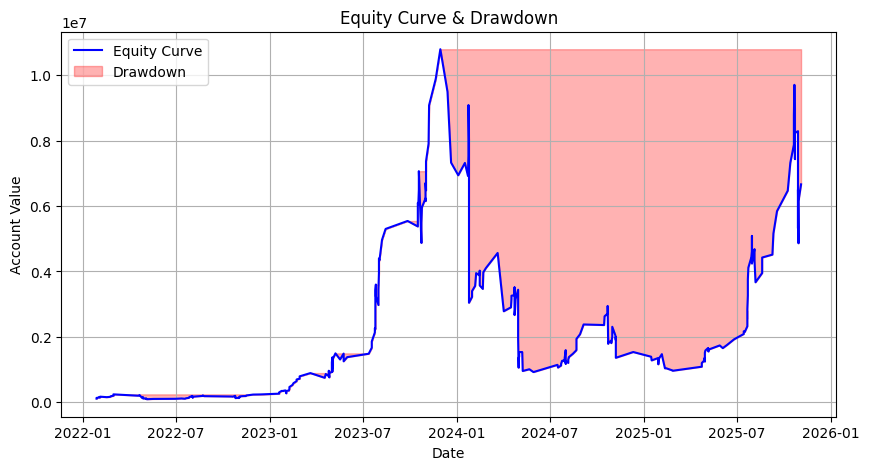

In [29]:
import matplotlib.pyplot as plt


account_values = backtest["MONEY"]  

#Compute returns
returns = account_values.pct_change().fillna(0)

#Maximum Drawdown (MDD)
running_max = account_values.cummax()
drawdown = (account_values - running_max) / running_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

earning_dates = pd.to_datetime(backtest["earn_date"])
# Assign each trade to a quarter, compute per-quarter returns, and subtract quarterly rfr
backtest["quarter"] = earning_dates.dt.to_period("Q")
quarterly_returns = backtest.groupby("quarter")["MONEY"].agg(['first', 'last'])
quarterly_returns['return'] = (quarterly_returns['last'] - quarterly_returns['first']) / quarterly_returns['first']
rfr_quarter = 0.045 / 4 #interest rate per year, divided into quarters
quarterly_returns['excess_return'] = quarterly_returns['return'] - rfr_quarter

#Sharpe ratio per quarter
sharpe_per_quarter = quarterly_returns['excess_return'].mean() / quarterly_returns['excess_return'].std()

#Annualize Sharpe (4 quarters/year)
sharpe_annualized = sharpe_per_quarter * np.sqrt(4)

print(f"Quarterly Sharpe: {sharpe_per_quarter:.2f}")
print(f"Annualized Sharpe: {sharpe_annualized:.2f}")


plt.figure(figsize=(10,5))
plt.plot(backtest["earn_date"], account_values, label='Equity Curve', color='blue')
plt.fill_between(backtest["earn_date"], account_values, account_values.cummax(), 
                 color='red', alpha=0.3, label='Drawdown')
plt.title('Equity Curve & Drawdown')
plt.xlabel('Date')
plt.ylabel('Account Value')
plt.legend()
plt.grid(True)
plt.show()

In [526]:
quarterly_returns['excess_return'].std()

np.float64(0.13080297278436778)